In [28]:
# Main Code for Data 
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

#Name of CSV
data = 'final_data.csv'

#read CSV
scatter_data = pd.read_csv(data)
scatter_data.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
0,Jan-2005,2005,1052224.0,1.831,5.3,181.2,138.5,138.6
1,Feb-2005,2005,1244753.0,1.910,5.4,179.8,138.6,138.4
2,Mar-2005,2005,1564938.0,2.079,5.2,176.4,138.3,138.3
3,Apr-2005,2005,1493837.0,2.243,5.2,176.9,138.3,138.4
4,May-2005,2005,1488171.0,2.161,5.1,170.7,138.7,138.8


In [36]:
# Get last 5 years of data only
five_years=scatter_data[scatter_data["Year"]>2016]
five_years.head()

,MonthYear,Year,Sales,Price Per Gallon,Unemployment_Rate,Steel_Price_Index,New_Auto_Price_Index,Used_Auto_Price_Index
144,Jan-2017,2017,1140841.0,2.349,4.7,204.8,148.092,139.306
145,Feb-2017,2017,1331716.0,2.304,4.6,207.3,148.083,137.935
146,Mar-2017,2017,1553142.0,2.325,4.4,213.3,147.766,136.951
147,Apr-2017,2017,1424793.0,2.417,4.5,212.0,147.807,138.750
148,May-2017,2017,1517197.0,2.391,4.4,213.7,147.571,140.076


In [38]:
#Calculation of averages for gas price averages, auto sales averages, unemployment, & steel
mean_gas = five_years.groupby('MonthYear').mean()['Price Per Gallon']
mean_sales = five_years.groupby('MonthYear').mean()['Sales']
mean_ue = five_years.groupby('MonthYear').mean()['Unemployment_Rate']
mean_steel=five_years.groupby('MonthYear').mean()['Steel_Price_Index']

summary_mean = pd.DataFrame({"Average Gas Price":mean_gas,
                              "Average Auto Sales":mean_sales,
                             "Average Unemployment Rate":mean_ue,
                             "Average Steel Price Index": mean_steel})
summary_mean.head()

,Average Gas Price,Average Auto Sales,Average Unemployment Rate,Average Steel Price Index
MonthYear,,,,
Apr-2017,2.417,1424793.0,4.5,212.0
Apr-2018,2.757,1364619.0,4.0,234.1
Apr-2019,2.798,1355548.0,3.7,234.0
Apr-2020,1.841,563122.0,14.8,204.7
Apr-2021,2.858,1493938.0,6.1,322.8


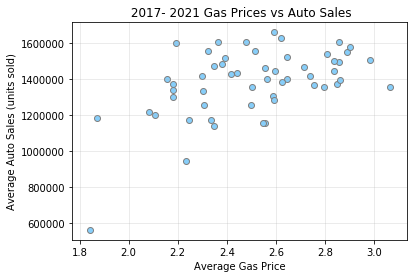

In [44]:
# Generate a scatter plot of average gas price vs. auto sales
plt.scatter(mean_gas, mean_sales, color="lightskyblue", edgecolor="grey")
plt.xlabel("Average Gas Price")
plt.ylabel("Average Auto Sales (units sold)")
plt.title(" 2017- 2021 Gas Prices vs Auto Sales")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Images/Gas vs Auto Sales.png")
plt.show()

In [46]:
print(f"The correlation coefficient between gas price and auto sales is {round(st.pearsonr(mean_gas,mean_sales)[0],2)}")

The correlation coefficient between gas price and auto sales is 0.51


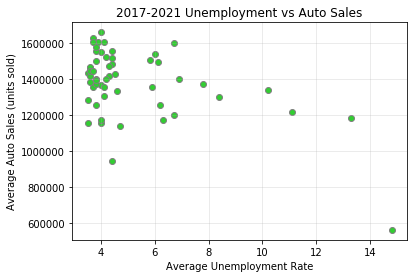

In [45]:
# Generate a scatter plot of average unemployment rate vs. auto sales
plt.scatter(mean_ue, mean_sales, color="limegreen", edgecolor="grey")
plt.xlabel("Average Unemployment Rate")
plt.ylabel("Average Auto Sales (units sold)")
plt.title("2017-2021 Unemployment vs Auto Sales")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Images/Unemployment vs Auto Sales.png")
plt.show()

In [47]:
print(f"The correlation coefficient between unemployment rate and auto sales is {round(st.pearsonr(mean_ue,mean_sales)[0],2)}")

The correlation coefficient between unemployment rate and auto sales is -0.53


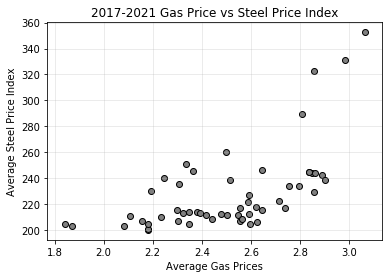

In [48]:
# Generate a scatter plot of average unemployment rate vs. auto sales
plt.scatter(mean_gas, mean_steel, color="grey", edgecolor="black")
plt.xlabel("Average Gas Prices")
plt.ylabel("Average Steel Price Index")
plt.title("2017-2021 Gas Price vs Steel Price Index")
plt.grid(linestyle="-", linewidth=1, alpha=0.25)

#Saves to file 
plt.savefig("Images/Gas Price vs Steel Price Index.png")
plt.show()

In [50]:
print(f"The correlation coefficient between gas prices rate and steel price index is {round(st.pearsonr(mean_gas,mean_steel)[0],2)}")

The correlation coefficient between gas prices rate and steel price index is 0.61
